# Success and Failure in Company Acquisitions in the IT Industry

<h2>A Brief Introduction</h2><br>
For the past few decades, the "tech dinosaurs" in the United States have been engaging in aggressive acquisitions of emerging businesses as a means of expanding their dominant power in the tech industry. Some successful acquisitions have faciliated the big-tech enterprises to extend their business power over emerging industries, while acquisitions that have ended in failure impeded the growth of the business as a liability. <br><br>
Throughout this project, my goal is to look into the instances of company acquisitions of big-tech enterprises, and determine how it reveals the business strategies that these enterprises have implemented in the past few decades. <br><br>
Note: The 7 big-tech enterprises that I will be examining include:<br>
<blockquote>
    Apple<br>Facebook<br>Google<br>IBM<br>Microsoft<br>Twitter<br>Yahoo
</blockquote>


<h2>Project Goal and Process</h2><br>
Through deeply analyzing and exploring the data I have collected, I will methodically pursue my project goal by answering the following sub-questions:<br><blockquote>
1. How has the acquisition strategy change in each company over the past few decades? How is this reflected in the performance (stock prices) of each company?<br>
2. When grouping the 7 Big-Tech companies according to the sector of industry that belong to (ex. Facebook & Twitter - Social Media, Google & Yahoo - Search Engine, etc.), how does the acquisition strategy differ across each group?<br>
3. Is larger investment in company acquisitions correlated to greater success in business (increase in stock prices?)<br>
4. Are there key acquisitions that pinpoint that lead the stock prices to increase or decrease heavily? <br>
5. Are there notable derived products from the acquired companies that has led to an increase in stock prices?<br>
</blockquote>

<h4> Where I got my data</h4><br>
The dataset, "acquisitions.csv", which contains rich information on past company acquisitions of these 7 enterprises was obtained from Kaggle <b>(https://www.kaggle.com/shivamb/company-acquisitions-7-top-companies)</b>. <br>
The stock data was acquired through web scraping on <b>Yahoo Finance</b>. My code for web scraping is included in <b>'webscraper.py'</b>.

<h3>Exploratory Data Analysis (EDA)</h3><br>Before we proceed with the analysis, let's take a quick look and explore our dataset, "acquisitions.csv". 'clean_data_acq' module is a file that contains functions that cleans up the dataset.

In [2]:
import pandas as pd
import clean_data_acq as cd
acquisitions = pd.read_csv('acquisitions.csv')
acquisitions = cd.clean_data(acquisitions)
print(acquisitions.head())

      id  year comany_acquired                      business country  \
0  ACQ99  2015           bebop                Cloud software     USA   
1  ACQ98  2015        Fly Labs                 Video editing     USA   
2  ACQ97  2015       Clearleap  Cloud-based video management     USA   
3  ACQ96  2015      Metanautix            Big Data Analytics     USA   
4  ACQ95  2015     Talko, Inc.         Mobile communications     USA   

        products_derived parentCompany       date  
0  Google Cloud Platform        Google 2015-11-11  
1          Google Photos        Google 2015-11-11  
2                   None           IBM 2015-12-08  
3                   None     Microsoft 2015-12-18  
4                   None     Microsoft 2015-12-21  


There are 7 variables in our dataset (I have purposefully taken out the "Value (USD)" variable in order to examine it separately later in the analysis):<br>
<blockquote>id<br>year<br>company_acquired<br>business<br>country<br>products_derived<br>parentCompany</blockquote><br>


The stock data is included in 'stock.csv', which is created from the function <b>stock_data()</b> in <b>clean_data_acq</b> module. As can be seen from below, the data includes stock prices in a week interval, to neglect the minor fluctuations in the stock prices.

In [3]:
stock_data = pd.read_csv('stock.csv', index_col=0)
print(stock_data.head(), '\n')
print("List of companies and counts included in our 'stock_data' datatset")
print(stock_data['company'].value_counts())

  company     price      volume        date
0   apple  0.337054  3060321600  1988-09-01
1   apple  0.334821  3563649600  1988-10-01
2   apple  0.316964  2939865600  1988-11-01
3   apple  0.334821  2946070400  1988-12-01
4   apple  0.323661  7345833600  1989-01-01 

List of companies and counts included in our 'stock_data' datatset
microsoft    421
apple        397
ibm          253
google       181
yahoo        145
facebook     109
twitter       94
Name: company, dtype: int64


<h2>Part 1: Association between Stock Prices and Acquisitions of Each Company</h2>

Let us first begin by comparing each company's acquisitions and the change in stock prices over the years.

In [17]:
import stock_acquisition as stock_acq

# Creating objects that contain the acquisition and stock data for each company
apple_acq = stock_acq.Company_acq('Apple')
apple_stock = stock_acq.make_stock_object(apple_acq)

microsoft_acq = stock_acq.Company_acq('Microsoft')
microsoft_stock = stock_acq.make_stock_object(microsoft_acq)

ibm_acq = stock_acq.Company_acq('IBM')
ibm_stock = stock_acq.make_stock_object(ibm_acq)

google_acq = stock_acq.Company_acq('Google')
google_stock = stock_acq.make_stock_object(google_acq)

yahoo_acq = stock_acq.Company_acq('Yahoo')
yahoo_stock = stock_acq.make_stock_object(yahoo_acq)

facebook_acq = stock_acq.Company_acq('Facebook')
facebook_stock = stock_acq.make_stock_object(facebook_acq)

twitter_acq = stock_acq.Company_acq('Twitter')
twitter_stock = stock_acq.make_stock_object(twitter_acq)

<b>Company_acq</b> is a class type object that stores functionality on the data for each company's acquisitions. <b>make_stock_object()</b> is a function that creates a <b>Company_stock</b> object, which is another class type object that stores the historical stock price data for each company. <br><br> Now, we will visualize the historical stock data along with the number of acquisitions of each company over the past few decades, using the following graphing function.
<br><br> Note: <i>Yahoo has delisted from the stock market in 2017, and thus its historical stock prices is only dated up until 2017.</i>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function that graphs historical stock prices and number of acquisitions; takes in the pyplot.axis object, 
# Company_acq object, Company_stock object, and intervals for years and acquisitions variables
def plot_stock_acq(ax1, acq_object, stock_object, x_intervals=None, y_intervals=None):

  ax1.bar(x=acq_object.get_year_range(), height=acq_object.get_year_count()['id'], color = 'lightblue', linewidth=.5, label='Acquisitions')
  ax1.set_ylabel('Number of Acquisitions', fontsize=14, color='lightblue')
  ax1.set_xlabel('Years', fontsize=12, color='grey')
  ax1.tick_params(axis='y', colors='lightblue')
  ax1.tick_params(axis='x', colors='grey')
  if y_intervals != None:
    ax1.set_yticks([int(i) for i in range(acq_object.get_year_count()['id'].min(), acq_object.get_year_count()['id'].max() + y_intervals, y_intervals)])
  plt.legend(loc="upper left")  

  ax2 = ax1.twinx()
  color='lightpink'
  ax2.plot(stock_object.get_stock_years(), stock_object.get_stock_data()['price'], color= color, linewidth=4,label='Stock Price')
  ax2.set_ylabel('Stock Price ($)', color=color, fontsize=14)
  ax2.tick_params(axis='y', colors=color)
  ax2.tick_params(axis='x', colors='grey')

  # If the stock object has greater range - this is to account for different ranges in stock and acquistions data
  if (x_intervals != None) & (stock_object.get_stock_years()[0] <= acq_object.get_min_year()):
    ax2.set_xticks(range(stock_object.get_stock_years()[0], stock_object.get_stock_years()[-1], x_intervals))
  # If the acquisition object has greater range 
  elif (x_intervals != None) & (acq_object.get_min_year() < stock_object.get_stock_years()[0]):
    ax2.set_xticks(range(acq_object.get_min_year(), stock_object.get_stock_years()[-1], x_intervals))
  plt.legend(loc="upper right")

  ax2.set_title(f"Number of Acquisitions and Stock Prices of {acq_object.get_companyName()}", fontsize=20, pad=20)


sns.set_context('talk', font_scale=1.0, rc={'grid.linewidth': 0.8})
sns.set_style('darkgrid')

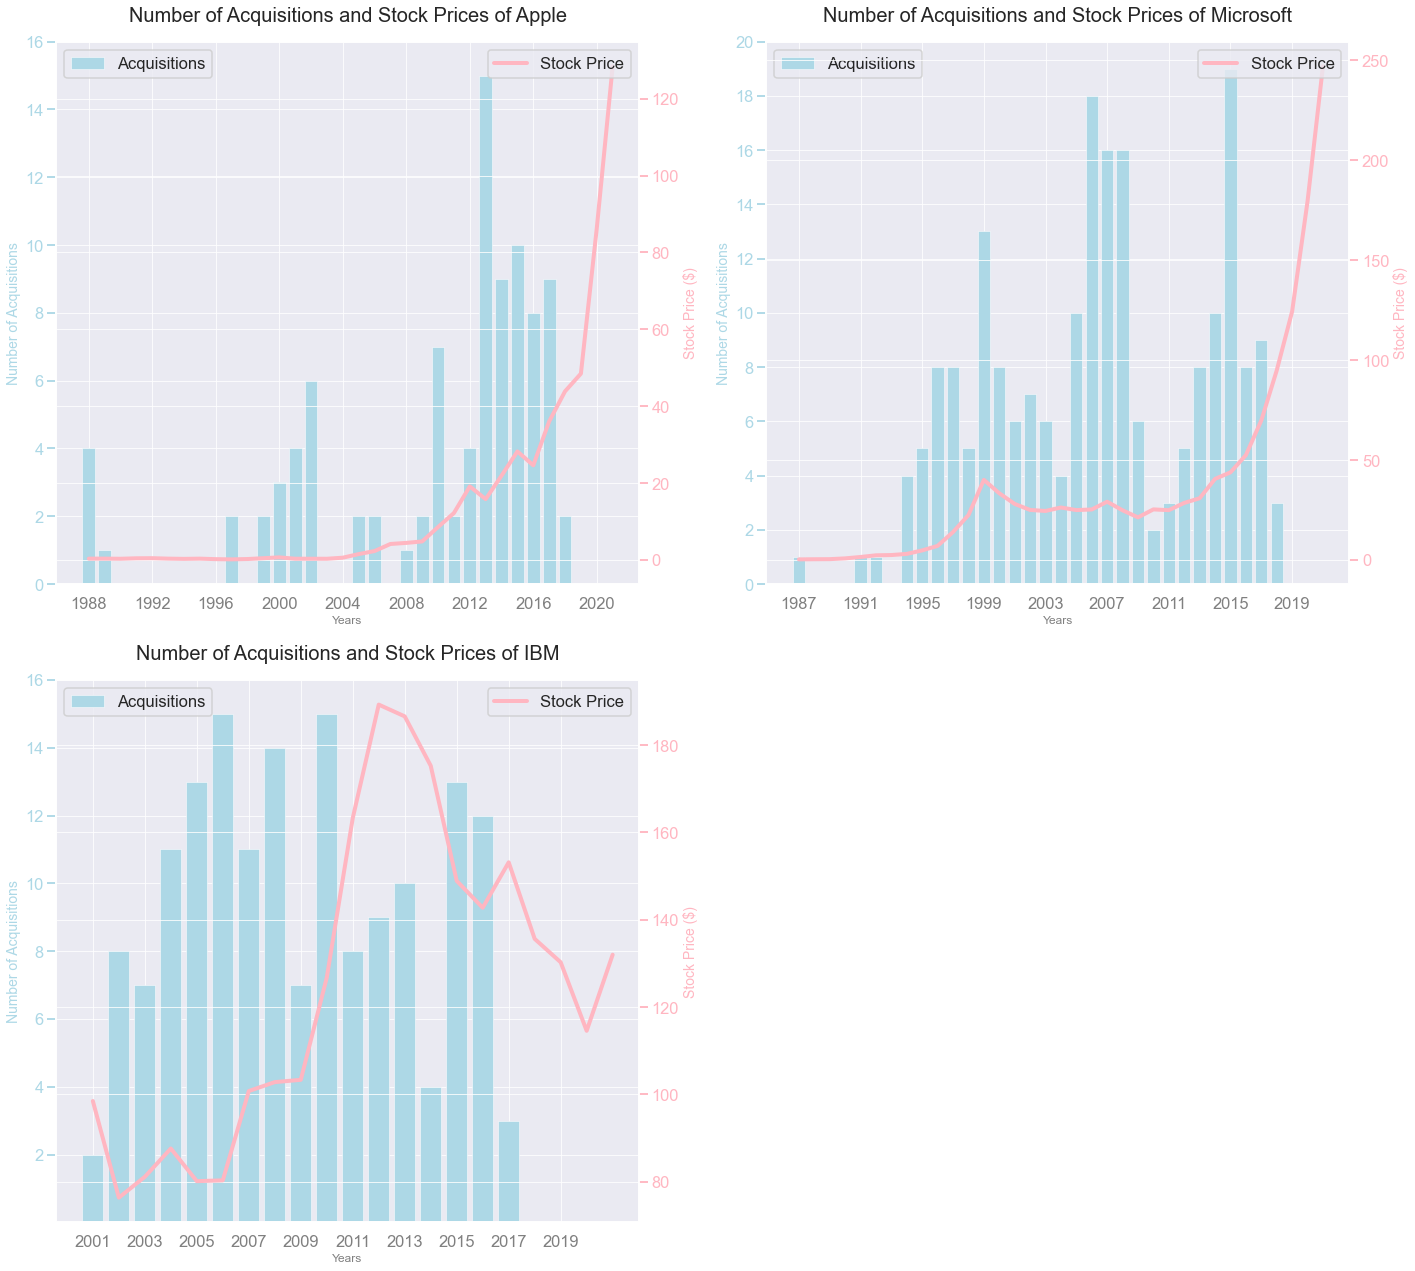

In [6]:
plt.figure(figsize=(20,18))

axis1= plt.subplot(2,2,1)
plot_stock_acq(axis1,apple_acq, apple_stock,4, 2)

axis2 = plt.subplot(2,2,2)
plot_stock_acq(axis2,microsoft_acq, microsoft_stock, 4, 2)
plt.tight_layout()

axis3 = plt.subplot(2,2,3)
plot_stock_acq(axis3, ibm_acq, ibm_stock, 2, 2)
plt.subplots_adjust(top=5.0, wspace=0.6)
plt.tight_layout()
plt.show()
plt.close()

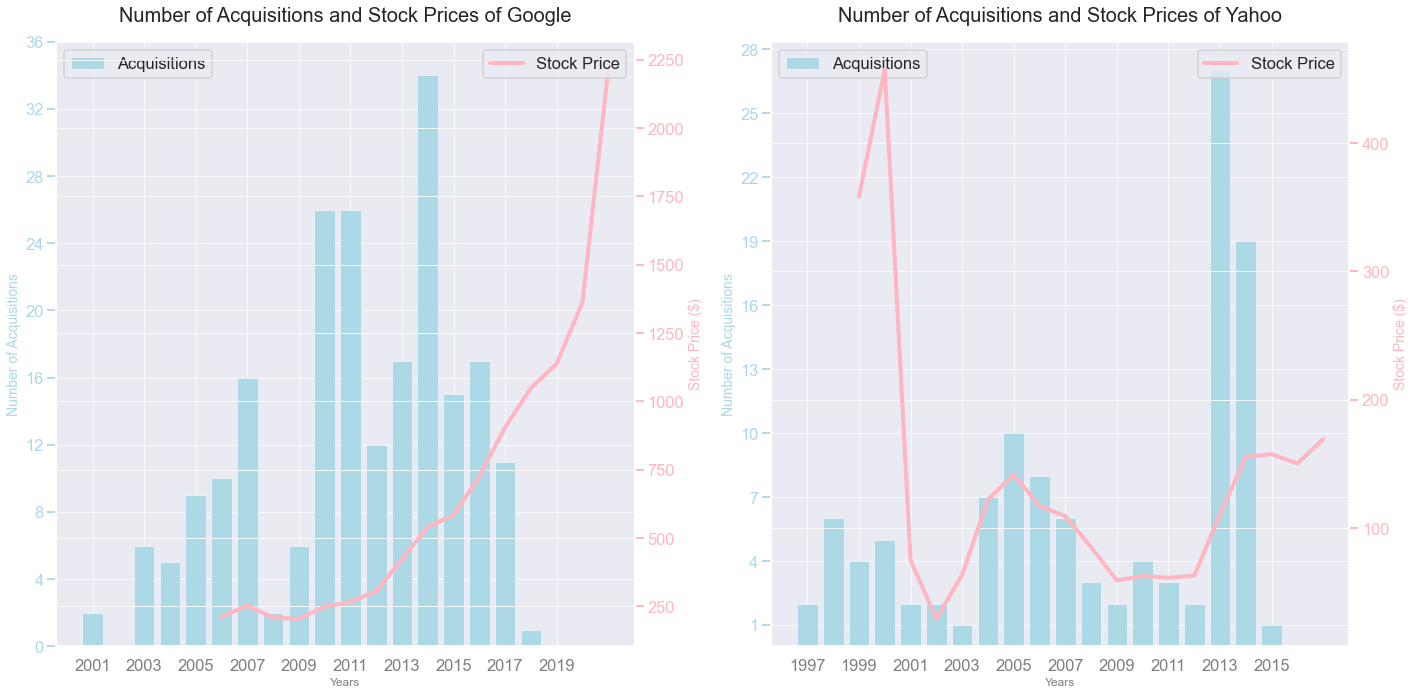

In [6]:
plt.figure(figsize=(20,10))

axis1= plt.subplot(1,2,1)
plot_stock_acq(axis1,google_acq, google_stock,2, 4)

axis2 = plt.subplot(1,2,2)
plot_stock_acq(axis2,yahoo_acq, yahoo_stock, 2, 3)

plt.subplots_adjust(top=5.0, wspace=0.6)
plt.tight_layout()
plt.show()
plt.close()

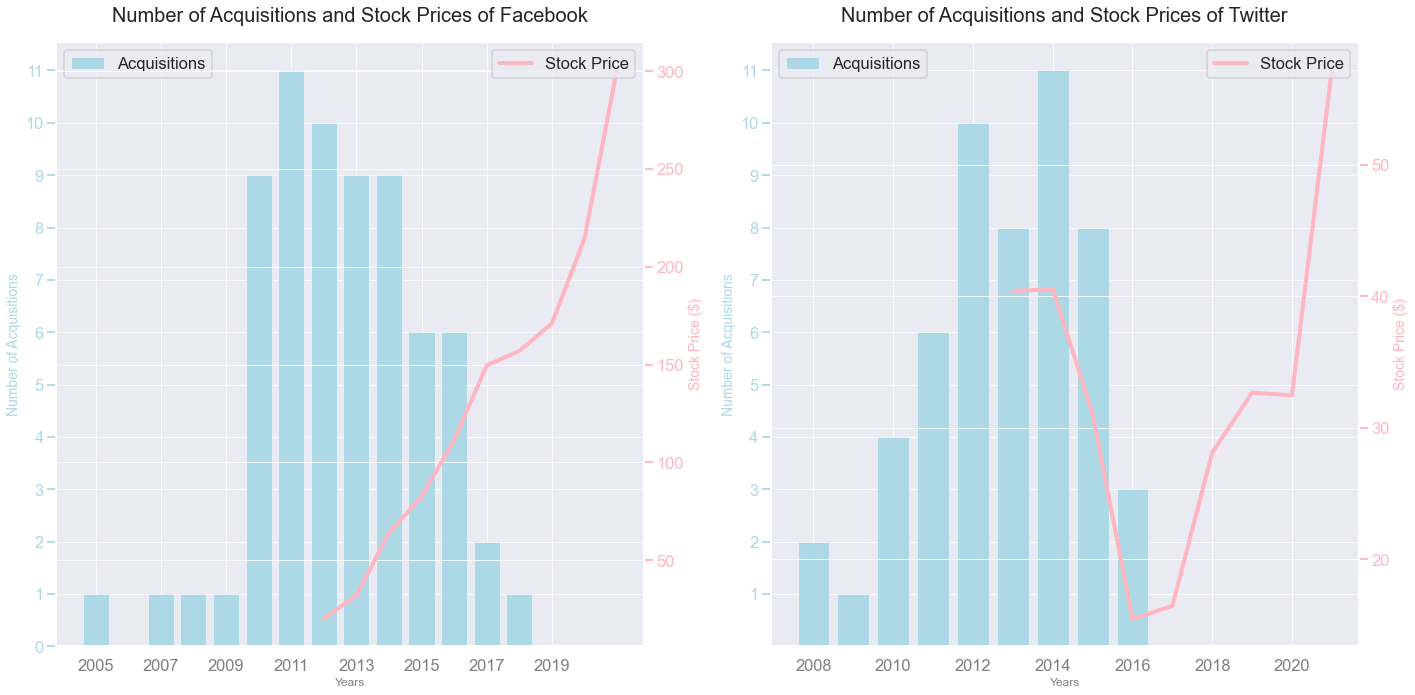

In [7]:
plt.figure(figsize=(20,10))

axis1= plt.subplot(1,2,1)
plot_stock_acq(axis1,facebook_acq, facebook_stock,2, 1)

axis2 = plt.subplot(1,2,2)
plot_stock_acq(axis2,twitter_acq, twitter_stock, 2, 1)

plt.subplots_adjust(top=5.0, wspace=0.6)
plt.tight_layout()
plt.show()
plt.close()

In these graphs, we can note the existence of linear relationships between number of acquisitions and stock prices in certain companies. Let's take a look at the <b>Pearson Correlation Coefficient</b> value in order to further examine the association between these two variables. <br><br> <i>The closer the value of Pearson Correlation Coefficient to 1, the stronger the positive linear relationship between the two variables, the closer it is to 0, the weaker the relationship between the two variables, and the closer it is to -1, the stronger the negative linear relationship between the two variables.</i>

In [16]:
#Creating a dataframe that combines the stock prices data and the acquisition data
apple_combined = stock_acq.combine_stock_acq(apple_acq, apple_stock)
microsoft_combined = stock_acq.combine_stock_acq(microsoft_acq, microsoft_stock)
ibm_combined = stock_acq.combine_stock_acq(ibm_acq, ibm_stock)
google_combined = stock_acq.combine_stock_acq(google_acq, google_stock)
yahoo_combined = stock_acq.combine_stock_acq(yahoo_acq, yahoo_stock)
facebook_combined = stock_acq.combine_stock_acq(facebook_acq, facebook_stock)
twitter_combined = stock_acq.combine_stock_acq(twitter_acq, twitter_stock)

from scipy.stats import pearsonr
# Zipping the combined dataframes and company names to print out the value of the Pearson Correlation Coefficient for each company
company_names = ['Apple', 'Microsoft', 'IBM', 'Google', 'Yahoo', 'Facebook', 'Twitter']
combined_df = [apple_combined, microsoft_combined, ibm_combined, google_combined, yahoo_combined, facebook_combined, twitter_combined]
print("Pearson Correlation Coefficient between Stock Prices and Number of Acquisitions\n")
for name, each_df in zip(company_names, combined_df):
    pearson_cc = pearsonr(each_df['id'], each_df['price'])[1]
    print(f'{name}: {round(pearson_cc,4)}')

Pearson Correlation Coefficient between Stock Prices and Number of Acquisitions

Apple: 0.0005
Microsoft: 0.0219
IBM: 0.422
Google: 0.5917
Yahoo: 0.7591
Facebook: 0.0004
Twitter: 0.0797


The linear relationship between the number of acquisitions and the stock prices of each company tells us how the acquistions of each company have reflected on the stock performance of the company.<br> We can see that for <b>Yahoo, Google, and IBM</b>, there exists a <i>strong linear relationship </i>between the two variables. This indicates that the acquisitions of start-ups and smaller companies have resulted in an increase of their stock prices, which allows us to speculate that these companies <i> put an emphasis on expanding their business through acquisitions. </i>(We will further inspect this point throughout the project.) <br>
On the other hand, the correlation coefficient values of <b>Apple, Microsoft, Facebook, and Twitter</b> displayed a <i>weak correlation </i>between the number of acquisitions and their stock prices, which allows us to speculate that <i>these companies are less dependent on the strategy of expanding their businesses through acquisitions.</i>